## 1. Business Understanding
**Objective:**  
Determine which aircraft pose the lowest risk for commercial and private operations.

**Key Questions:**

1.What factors contribute to the risk of accidents (e.g., aircraft type, age, usage)?

2.How can we quantify and compare the risk levels of different aircraft?
## 2. Data Understanding
**Data Sources:**

Aviation Accident Database & Synopses (including records of accidents, incident reports, aircraft types, operational history, etc.)
**Data Collection:**

Gather data on aircraft accidents, including:
Aircraft make and model
Year of manufacture
Number of accidents per aircraft type
Severity of accidents (fatalities, injuries)
Operational history (commercial vs. private use)
Other relevant factors (e.g., maintenance records, pilot experience)

**Initial Exploration:**

Analyze the dataset to understand its structure, completeness, and any anomalies.
Identify key variables that can impact accident rates.
# 3. Data Preparation
**Data Cleaning:**

Handle missing values (e.g., remove or impute missing data).
Remove duplicates and irrelevant records.
Standardize data formats (e.g., date formats, categorical variables).

**Feature Engineering:**

Create new variables, such as:
Accident rate per aircraft type (number of accidents/number of operational hours).
Age of the aircraft at the time of the accident.
Categorization of accidents (minor, serious, fatal).


##4. Evaluation
Results Interpretation:

Assess the findings to identify which aircraft types have the lowest risk profiles.
Validate the model by comparing predicted accident rates with actual historical data.
Key Insights:

Highlight specific aircraft models that have consistently low accident rates.
Identify any trends related to age, type of operation, or other factors that correlate with lower risk.



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##DATA LOADING


In [18]:
#Loading the dataset.
Aviation_data = pd.read_csv('/content/AviationData.csv.zip',encoding='latin-1')
Aviation_data.head()

<ipython-input-18-45338a93fc34>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Aviation_data = pd.read_csv('/content/AviationData.csv.zip',encoding='latin-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


##DATA EXPLORATION

In [19]:
print(Aviation_data.describe())# OUTPUTS STATISTICAL VALUES ABOUT THE DATA



       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75% 

In [20]:
print(Aviation_data.info())#OUTPUTS COLUMN VALUES AND TYPE OF DATA AS CONTENTS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [21]:

print(Aviation_data.isnull().sum())#CHECK THE AMOUNT OF NULL VALUES

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

### DATA CLEANING


In [22]:
# CROSSCHECK FOR THE NULL VALUES
print(Aviation_data.isna().sum())


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [23]:
#Dropping columns with huge number of values missing and those with values that don't aid our analysis.
thershold=0.3
missing_counts= Aviation_data.isna().sum()
total_row= len(Aviation_data)
drop_col= [i for i in Aviation_data.columns if missing_counts[i]/total_row > thershold]
Aviation_data.drop(columns=drop_col,inplace=True)
Aviation_data.shape

(88889, 22)

In [24]:
print(Aviation_data.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')


In [25]:
print(Aviation_data.isna().sum())

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6384
Publication.Date          13771
dtype: int64


In [27]:
Aviation_data.drop('Publication.Date',axis=1,inplace=True)

In [28]:
d={}
for i in Aviation_data.columns:
    d[i]=len(Aviation_data[i].unique())
unique_values= pd.DataFrame(list(d.items()), columns=['Column', 'unique_val'])
unique_values["missing_values"]= Aviation_data.isna().sum().values
unique_values

,Column,unique_val,missing_values
0,Event.Id,87951,0
1,Investigation.Type,2,0
2,Accident.Number,88863,0
3,Event.Date,14782,0
4,Location,27759,52
5,Country,220,226
6,Injury.Severity,110,1000
7,Aircraft.damage,5,3194
8,Registration.Number,79105,1382
9,Make,8238,63


In [29]:
subset_col=list(unique_values[unique_values['missing_values']>1000]['Column'])
Aviation_data.dropna(subset=subset_col, inplace=True)
Aviation_data.shape

(63312, 21)

In [30]:
Aviation_data.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,15
Country,198
Injury.Severity,11
Aircraft.damage,0
Registration.Number,0
Make,8


In [32]:
Further_clean=['Location','Country','Injury.Severity','Model','Make']
for i in Further_clean:
        Aviation_data[i].fillna(Aviation_data[i].mode()[0],inplace=True)
Aviation_data.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Injury.Severity,0
Aircraft.damage,0
Registration.Number,0
Make,0


In [37]:

# Data cleaning (example)
Aviation_data['DateTime'] = pd.to_datetime(Aviation_data['Event.Date'] , errors='coerce')
Aviation_data.dropna(subset=['DateTime'], inplace=True)

In [45]:
Aviation_data['Model'].head()

,Model
0,108-3
1,PA24-180
3,112
6,180
7,140


## DATA  VISUALIZATIONS


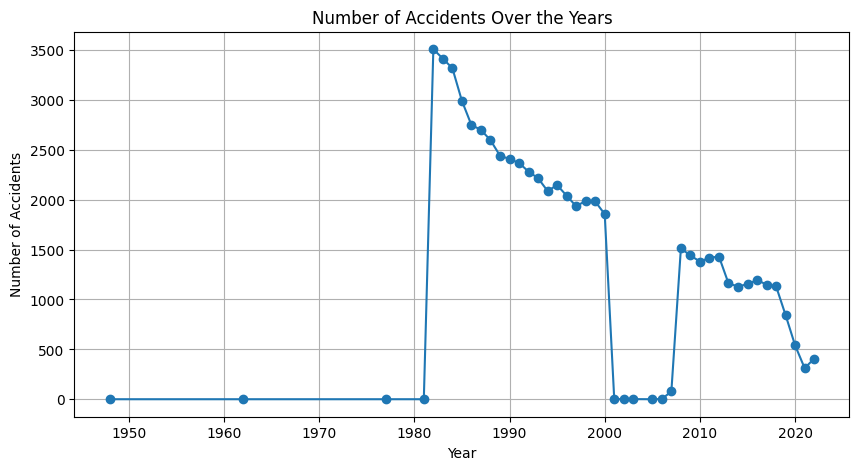

In [38]:

# Group by year and count accidents
accidents_per_year = Aviation_data.groupby(Aviation_data['DateTime'].dt.year).size()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o')
plt.title('Number of Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()

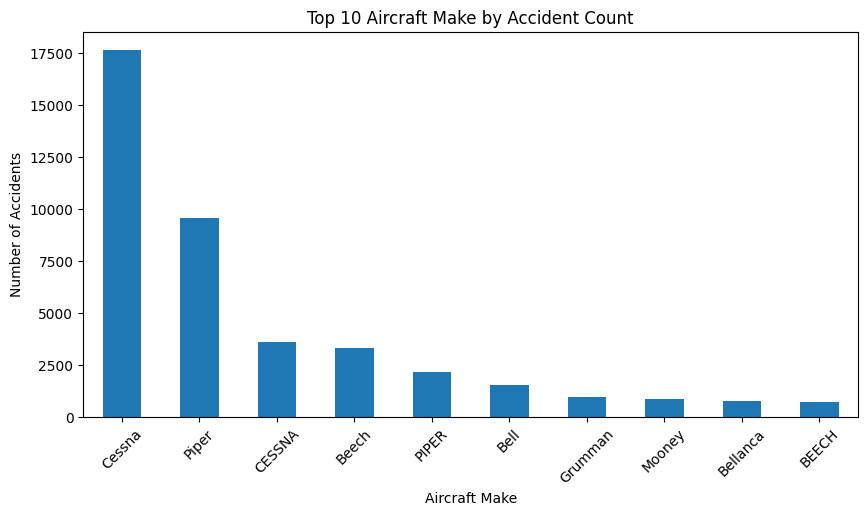

In [47]:
#Group by aircraft model and count accidents
model_counts = Aviation_data['Make'].value_counts().head(10)  # Top 10 models

# Plotting
plt.figure(figsize=(10, 5))
model_counts.plot(kind='bar')
plt.title('Top 10 Aircraft Make by Accident Count')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()